<a href="https://colab.research.google.com/github/suhailmk9/yes-bank-stock-closing-price-prediction/blob/main/YesBank_Stockprice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Problem Title - Yes Bank Stock Closing Price**



###**Problem Statement** - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.


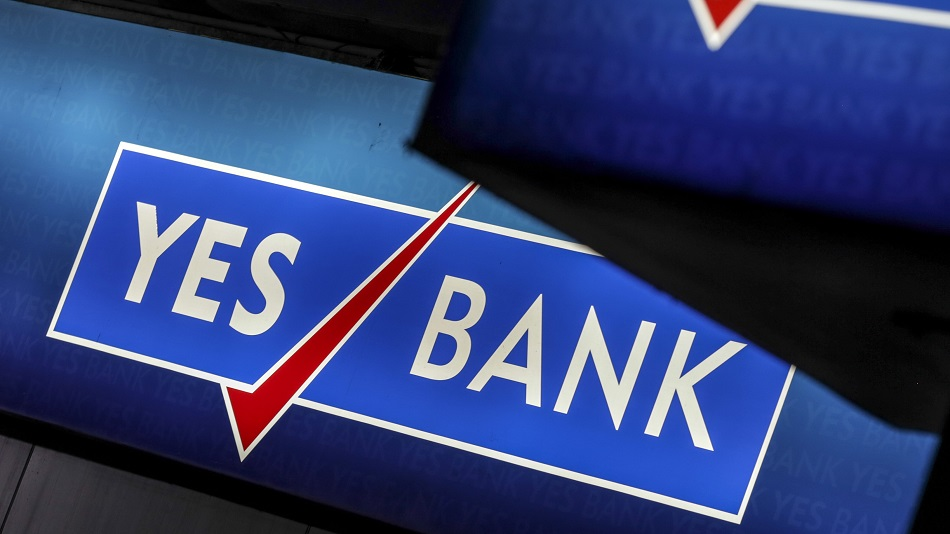

#What is stock?
A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Since, we've the **YES BANK** Stock price dataset which has the monthly stock prices. It contains the following features:

###**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

###**High** - The high is the highest price at which a stock traded during a period.

###**Low** -The low is the highest price at which a stock traded during a period.

###**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity. 

#**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#**mount drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Loading data**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/linear regression/YesBank_StockPrices.csv")

#**Data preparation**



In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.shape

(185, 5)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


we have zero null values in our data frame.

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


###Checking for null values in the data###

In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

###Checking for duplicates value###


In [ ]:
duplicate = df.duplicated()
print(duplicate.value_counts())

False    185
dtype: int64


There are no duplicate values in our data.


The date column needs to be converted into a date time object. This is achieved by using strptime of the datetime library. The Given Date format MMM-YY is converted to proper date of YYYY-MM-DD

In [ ]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


#**Visualising the data**

**closing price vs date graph**


In [ ]:
!pip install chart_studio
from chart_studio.plotly import iplot

import plotly.graph_objects as go

     |████████████████████████████████| 64 kB 2.7 MB/s 


In [ ]:
#setting layout for plot
layout = go.Layout(title = "Stock price of yes bank",xaxis= dict(title = "Date",titlefont = dict(size=18,color = "#7f7f7f")),
                   yaxis = dict(title = "Price",titlefont = dict(size = 18,color = "#7f7f7f")))
data = [{'x': df['Date'], 'y':df['Close']}]
plot = go.Figure(data = data,layout=layout)

In [ ]:
#plot offline
from plotly.offline import iplot
iplot(plot)

we can see that up until 2018, the stock prices more or less, kept increasing but there was a sudden dip after that. This can be attributed to the Yes bank fraud case against Rana Kapoor.

**Univariate Analysis**

We will take a look at distribution plots of our features.

BIFURCATE DEPENDENT AND INDEPENDENT VARIABLES

In [ ]:
#copying data to preserve orignal file
df1= df.copy()

In [ ]:
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

INDEPENDENT VARIABLES

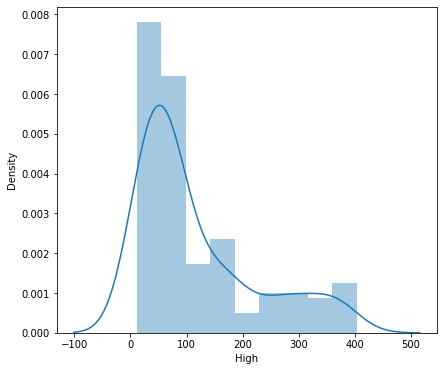

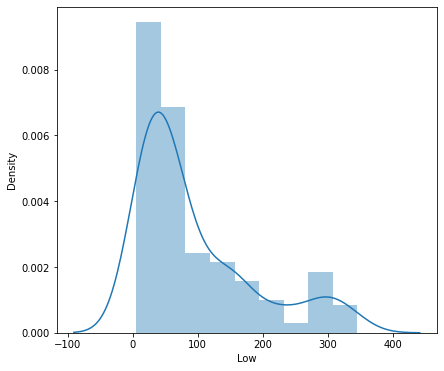

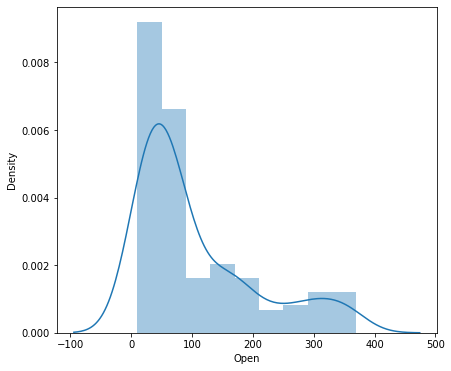

In [ ]:
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel('Density')
    fig.set_xlabel(var)

DEPENDENT VARIABLE

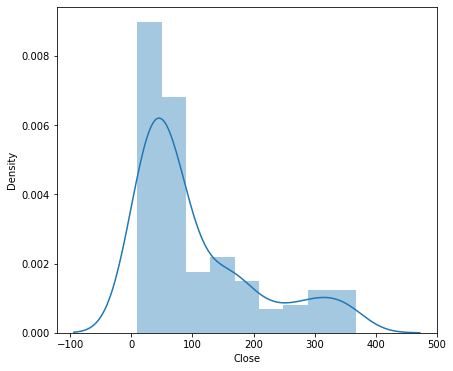

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna())




LOG TRANSFORMATION

---
Since our data is skewed, we will perform some transformation during regression analysis.

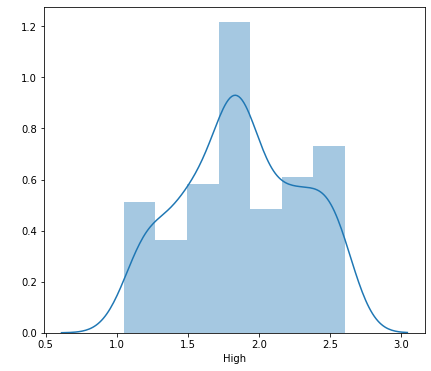

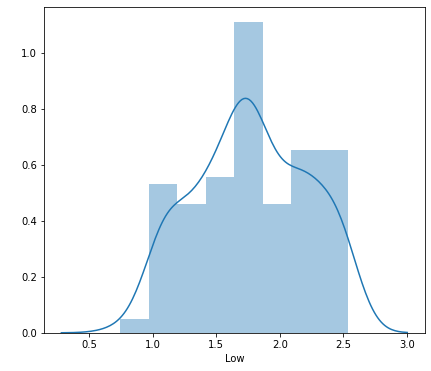

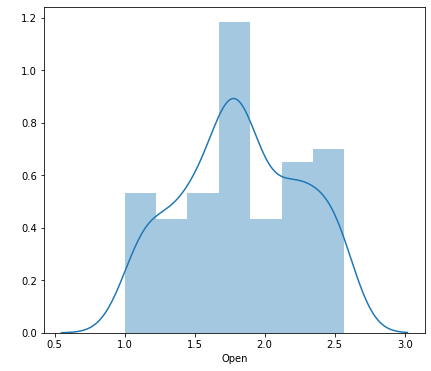

In [ ]:
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

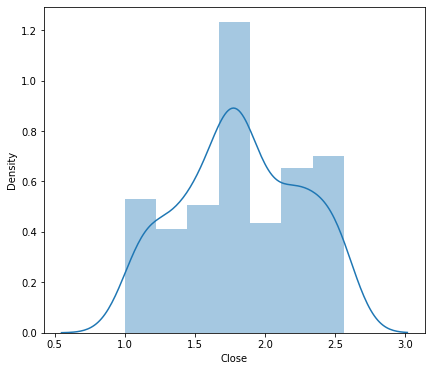

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(np.log10(df1['Close']))

Now our data is almost normal distribution.


**BIVARIATE ANALYSIS**

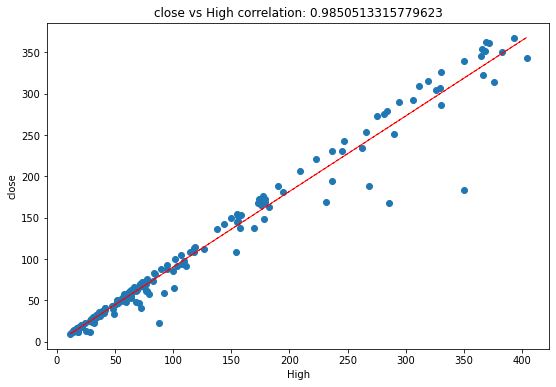

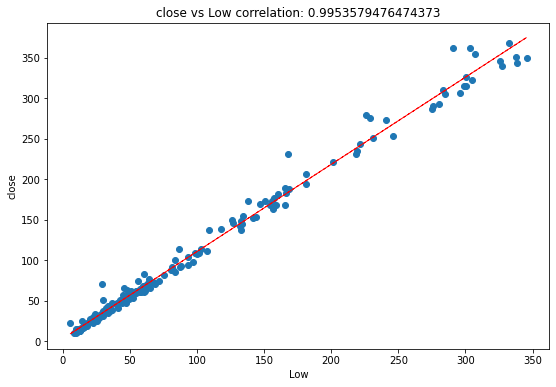

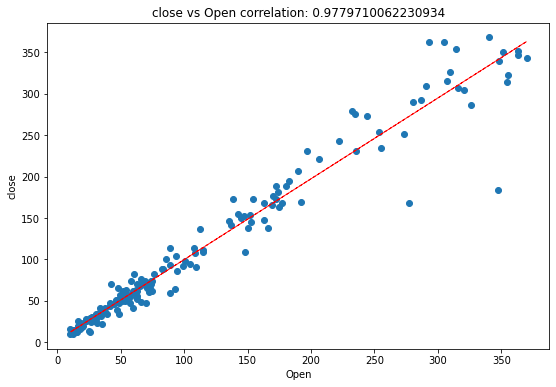

In [ ]:
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('close')
   ax.set_title('close vs ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df1[col], df1['Close'], 1)
   y_hat = np.poly1d(z)(df1[col])
 
   plt.plot(df1[col], y_hat, "r--", lw=1)
 
plt.show()

We can see that all the independent variables are linearly related to our dependent variable.


**CORRELATION**

Now, let see the correlation between all the features in our data set.

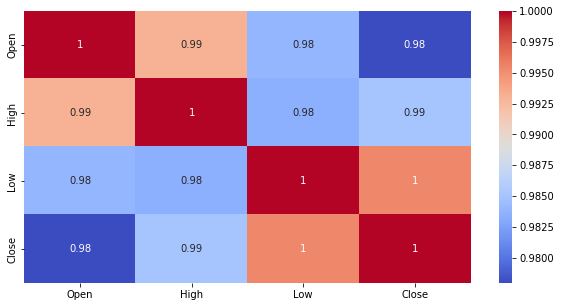

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

**DATAFRAME TO STORE EVALUATION METRICS**

To store the evaluation metrics for each regression model into this data frame to compare.

In [ ]:
#empty data frame creation
i=0
metric_df=pd.DataFrame()

#**Splitting data in train and test**

In [ ]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


In [ ]:
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#**Linear Regression**

In [ ]:
# Fitting Linear Regression to the Training set
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_train, y_train)

0.9943947124704909

In [ ]:
reg.coef_

array([ 206.39223501,  339.75965241, -178.58396386])

In [ ]:
reg.intercept_

7.981643192931017

In [ ]:
#predictions
y_pred = reg.predict(x_test)
y_pred

array([ 26.5264613 ,  30.04697913,  52.99506974,  14.74919015,
       147.01000347, 339.97588471,  47.57404618,  26.7156191 ,
        25.53891247,  51.5485512 , 167.1168406 ,  52.40492841,
        15.03278394, 317.19036116,  74.02532594,  48.98214465,
        28.10792019, 134.70037858, 106.16190122,  90.75305749,
        28.99576342,  15.52145954, 108.22518038,  58.74416284,
       165.96721099,  19.27101903,  15.01972066,  51.82026038,
        30.42231711,  62.47316615, 261.58897929, 338.47373229,
        65.29568021, 232.0096057 ,  95.84913545,  54.02351579,
       242.48451636])

**EVALUATION**

In [ ]:
#evaluation metrics

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 19.988578593595022
RMSE : 4.470858820584142
R2 : 0.9978412541225983
Adjusted R2 :  0.9976450044973799


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Linear regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i+=1

**VISUALIZATION**

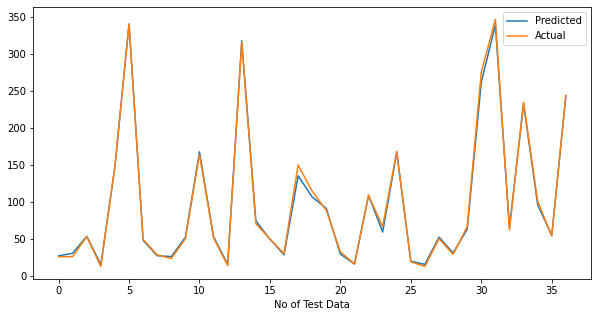

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#**Validating Assumption**

In [ ]:
#predicting 
y_train_pred = reg.predict(x_train)

In [ ]:
#Residual = Actual value - Predicted value

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_pred

**Lets check for heteroscedasticity:**

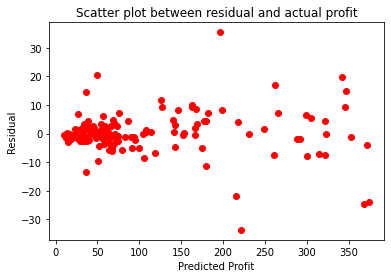

In [ ]:
#  Plotting scatter plot between residual and fitted values
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

There is no significant pattern visible. So the assumption of homoscedasticity is valid.

**Let's check if the mean of residuals is almost zero:**

In [ ]:
round((np.mean(residuals_train)))

0

the mean of residuals is zero

**Let's check for multicollinearity:**

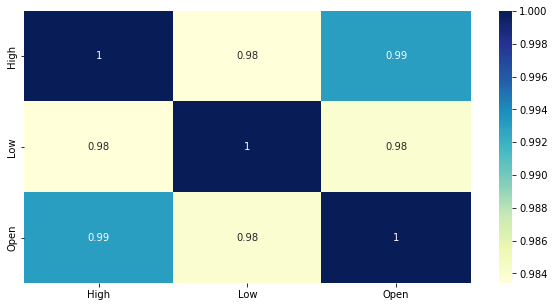

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(indep_var.corr(),  annot=True, cmap="YlGnBu")

Since our data doesn't contain perfect multicollinearity among independent variables. We can't remove any variables from our date because each of the variables are important for our model.

# **LASSO REGRESSION**

In [ ]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(x_train, y_train)

0.9943947120445369

In [ ]:
# Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -62.90049172560616


In [ ]:
#prediction
y_pred_lasso = lasso_regressor.predict(x_test)

**EVALUATION**

In [ ]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 20.878651216190214
RMSE : 4.569316274475889
R2 : 0.9977451271971334
Adjusted R2 :  0.9975401387605092


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Lasso regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

**VISUALIZATION**

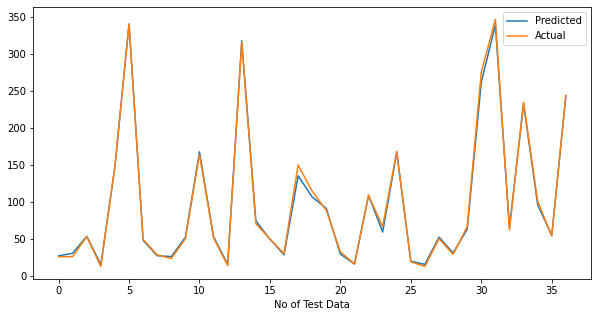

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **RIDGE REGRESSION**

In [ ]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(x_train, y_train)

0.9920836705746654

In [ ]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -59.333737891184775


In [ ]:
#Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

**EVALUATION**

In [ ]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 20.095425485603688
RMSE : 4.48279215284444
R2 : 0.9978297147684337
Adjusted R2 :  0.9976324161110186


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Ridge regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

**VISUALIZATION**

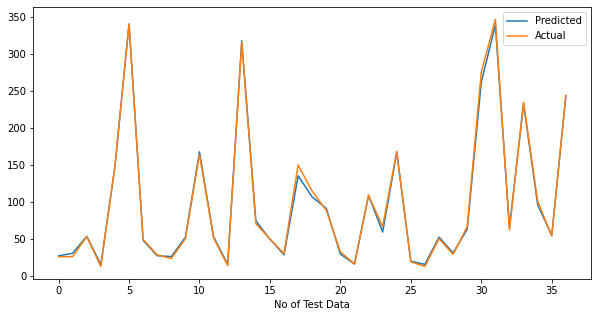

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#**ELASTICNET REGRESSION**

In [ ]:
#fitting data
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred_en = elasticnet.predict(x_test)

In [ ]:
# Cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -62.32590181197605


In [ ]:
#Prediction
y_pred_elastic = elastic_regressor.predict(x_test)

**EVALUATION**

In [ ]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 21.250552258088767
RMSE : 4.6098321290572795
R2 : 0.9977049622680845
Adjusted R2 :  0.997496322474274


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Elasticnet regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

**VISUALIZATION**

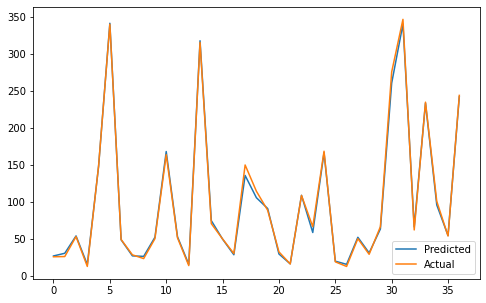

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#**METRICS COMPARISION**

We will now compare performance of all the regression models

In [ ]:
#sorting metrics
metric_df.sort_values(by=['MSE'],ascending=True,inplace=True)

In [ ]:
metric_df

,Model_Name,MSE,RMSE,R2,Adjusted R2
0,Linear regression,19.988579,4.470859,0.997841,0.997645
2,Ridge regression,20.095425,4.482792,0.997830,0.997632
1,Lasso regression,20.878651,4.569316,0.997745,0.997540
3,Elasticnet regression,21.250552,4.609832,0.997705,0.997496
